In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


ModuleNotFoundError: No module named 'graphviz'

In [34]:
red_wine = pd.read_csv("winequality-red.csv",delimiter=";")
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
red_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [36]:
red_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [37]:
model = KMeans()

In [38]:
wcss=[]

for k in range(1,11):
  model = KMeans(n_clusters=k, n_init="auto")
  model = model.fit(red_wine)
  wcss.append(model.inertia_)

[]

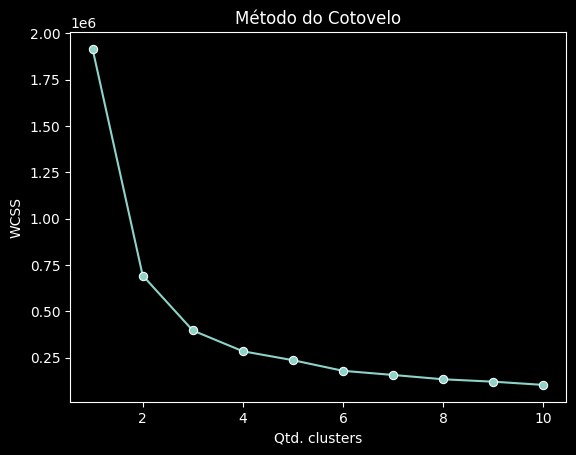

In [39]:
graph = sns.lineplot(x = range(1, 11), y = wcss, marker="o")
graph.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters')
graph.plot()

In [40]:
model = KMeans(n_clusters=8, n_init='auto')
model.fit(red_wine)
clusters = pd.DataFrame(data=model.labels_, columns=['cluster'])
clusters

,cluster
0,5
1,1
2,3
3,3
4,5
...,...
1594,4
1595,4
1596,4
1597,4


In [41]:
data = pd.concat([red_wine, clusters], axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,4
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,4
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,4
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,4


In [42]:
test = data[['pH','alcohol','quality','cluster']]
test1 = data[['residual sugar','fixed acidity','quality','cluster']]

[Text(0.5, 1.0, 'Teste')]

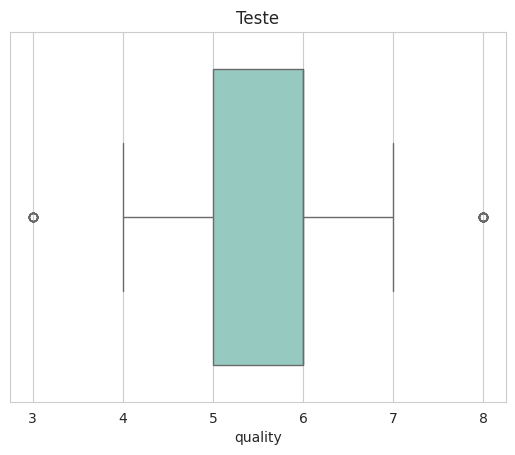

In [44]:
with sns.axes_style('whitegrid'):
    grafico_test = sns.boxplot(x=test['quality'])
grafico_test.set(title='Teste')


In [48]:
red_wine['quality'].drop_duplicates()

0      5
3      6
7      7
18     4
267    8
459    3
Name: quality, dtype: int64